## 1.1 Biến đổi cường độ ảnh (Image inverse transformation)

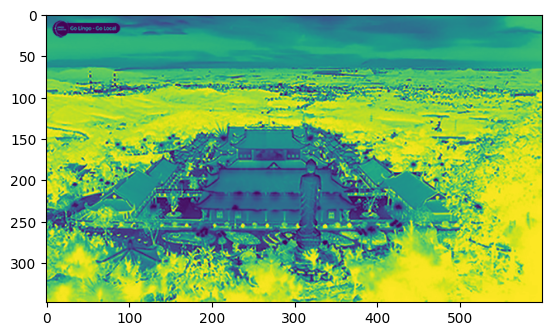

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio as iio
import matplotlib.pylab as plt

img = Image.open('exercise/pagoda.jpg').convert('L')
im_1 = np.asanyarray(img)
im_2 = 255 - im_1
new_img = Image.fromarray(im_2)
img.show()
plt.imshow(new_img)
plt.show()

## 1.2 Thay đổi chất lượng ảnh với Power law (Gamma - Correction)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5600\293582527.py:20: RuntimeWarning: divide by zero encountered in log
  b2 = np.log(b3) * gamma


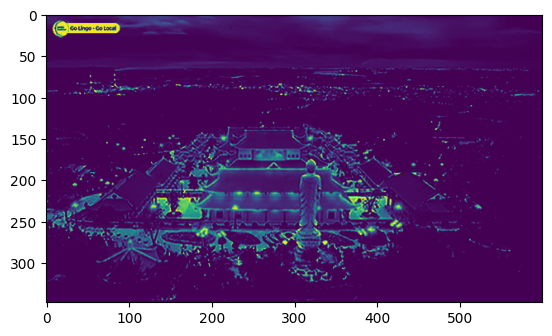

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio as iio
import matplotlib.pylab as plt

img = Image.open('exercise/pagoda.jpg').convert('L')
im_1 = np.asarray(img)
gamma = 5
b1 = im_1.astype(float)
b2 = np.max(b1)
b3 = b1/b2
b2 = np.log(b3) * gamma
c = np.exp(b2) * 255
c1 = np.clip(c, 0, 255).astype(np.uint8)
d = Image.fromarray(c1)
img.show()
d.show()
plt.imshow(d)
plt.show()

## 1.3 Thay đổi cường độ ảnh với Log Transformation

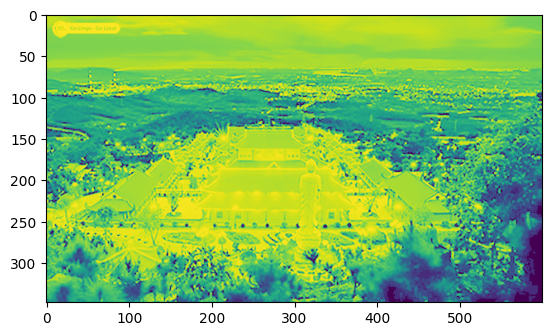

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio as iio
import matplotlib.pylab as plt

img = Image.open('exercise/pagoda.jpg').convert('L')
im_1 = np.asarray(img)
gamma = 5
b1 = im_1.astype(float)
b2 = np.max(b1)
c = (128 * np.log(1+b1))/np.log(1+b2)
c1 = np.clip(c, 0, 255).astype(np.uint8)
d = Image.fromarray(c1)
img.show()
d.show()
plt.imshow(d)
plt.show()

## 1.4 Histogram equalization

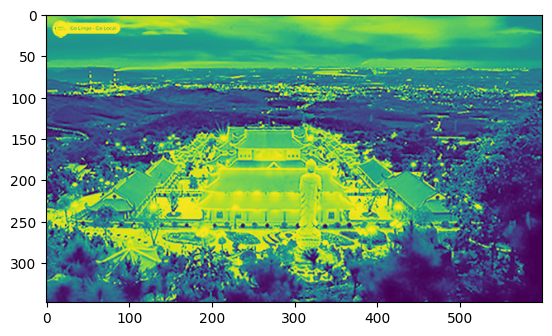

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio as iio
import matplotlib.pylab as plt

img = Image.open('exercise/pagoda.jpg').convert('L')
im1 = np.asarray(img)
b1 = im1.flatten()
hist, bins = np.histogram(im1, 256, [0, 255])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf, 0)
num_cdf_m = (cdf_m - cdf_m.min())*255
den_cdf_m = (cdf.max() - cdf_m.min())
cdf_m = num_cdf_m/den_cdf_m
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
im2 = cdf[b1]
im3 = np.reshape(im2, im1.shape)
im4 = Image.fromarray(im3)
img.show()
im4.show()
plt.imshow(im4)
plt.show()

## 1.5 Thay đổi ảnh với Contrast Stretching

0 255


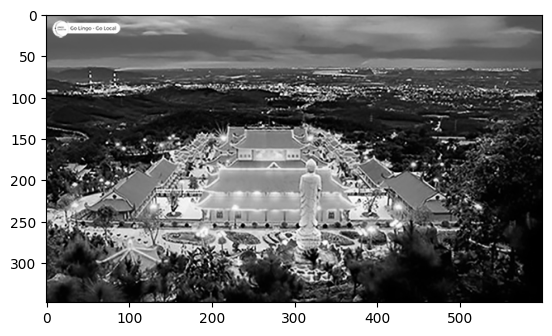

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio as iio
import matplotlib.pylab as plt

img = Image.open('exercise/pagoda.jpg').convert('L')
im1 = np.asarray(img)
b = im1.max()
a = im1.min()
print(a,b)
c = im1.astype(float)
im2 = 255*(c-a)/(b-a)
im3 = Image.fromarray(im2)
img.show()
im3.show()
plt.imshow(im3)
plt.show()

## 1.6 Biến đổi Fourier

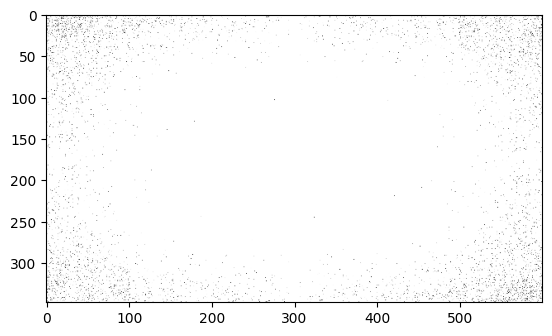

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio as iio
import matplotlib.pylab as plt
import scipy.fftpack

img = Image.open('exercise/pagoda.jpg').convert('L')
im1 = np.asanyarray(img)
c = abs(scipy.fftpack.fft2(im1))
d = scipy.fftpack.fftshift(c)
d = d.astype(float)
im3 = Image.fromarray(d)
img.show()
im3.show()
plt.imshow(im3)
plt.show()

## 1.6.2 Lọc ảnh trong miền tần suất

## Butter Lowpass Filter

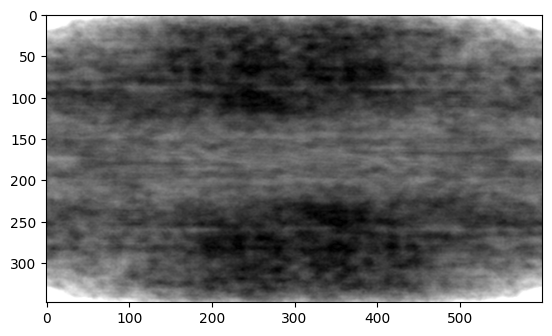

In [6]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio as iio
import matplotlib.pylab as plt
import scipy.fft
import scipy.fftpack

img =Image.open('exercise/pagoda.jpg').convert('L')
im1 = np.asarray(img)
c = abs(scipy.fftpack.fft2(im1))
d = scipy.fftpack.fftshift(c)
M = d.shape[0]
N = d.shape[1]
H = np.ones((M, N))
center1 = M/2
center2 = N/2
d_0 = 30
t1 = 1
t2 = 2*t1

for i in range(1, M):
    for j in range(1, N):
        r1 = (i - center1)**2 + (j - center2)**2
        r = math.sqrt(r1)
        if r > d_0:
            H[i, j] = 1/(1 + (r/d_0)**t1)
H = H.astype(float)
H = Image.fromarray(H)
con = d* H
e = abs(scipy.fftpack.ifft2(con))
e = e.astype(float)
im3 = Image.fromarray(e)

img.show()
im3.show()
plt.imshow(im3)
plt.show()

## Butterworth highpass Filter

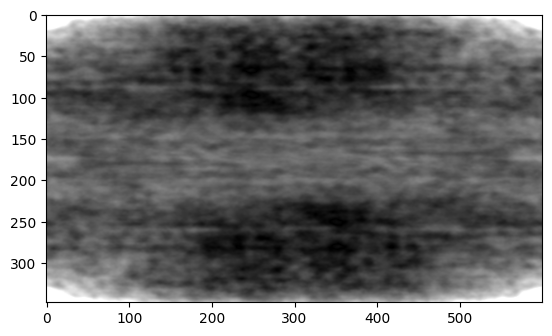

In [7]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio as iio
import matplotlib.pylab as plt
import scipy.fft
import scipy.fftpack

img =Image.open('exercise/pagoda.jpg').convert('L')
im1 = np.asarray(img)
c = abs(scipy.fftpack.fft2(im1))
d = scipy.fftpack.fftshift(c)
M = d.shape[0]
N = d.shape[1]
H = np.ones((M, N))
center1 = M/2
center2 = N/2
d_0 = 30
t1 = 1
t2 = 2*t1

for i in range(1, M):
    for j in range(1, N):
        r1 = (i - center1)**2 + (j - center2)**2
        r = math.sqrt(r1)
        if r > d_0:
            H[i, j] = 1/(1 + (r/d_0)**t2)
H = H.astype(float)
H = Image.fromarray(H)
con = d* H
e = abs(scipy.fftpack.ifft2(con))
e = e.astype(float)
im3 = Image.fromarray(e)

img.show()
im3.show()
plt.imshow(im3)
plt.show()

## BÀI TẬP

# 1. VIết chương trình tạo menu cho phép người dùng chọn các phương pháp biến đổi ảnh

Đang hiển thị ảnh: ha-long-bay-in-vietnam.jpg


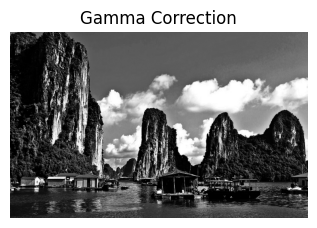

Đang hiển thị ảnh: pagoda.jpg


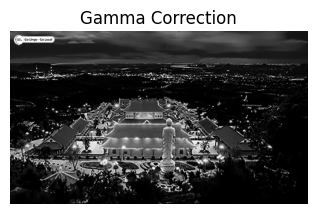

Đang hiển thị ảnh: quang_ninh.jpg


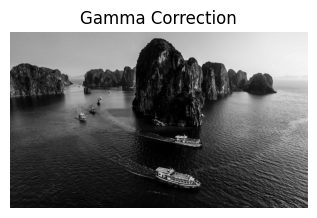

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image


def inverse(img): return 255 - img
def gamma_correction(img, gamma=2.2):
    return np.power(img / 255.0, gamma) * 255
def log_transform(img): return np.log1p(img) / np.log(256) * 255
def hist_equalization(img): return cv2.equalizeHist(img)
def contrast_stretch(img): return ((img - img.min()) / (img.max() - img.min()) * 255).astype(np.uint8)

mapping = {
    'I': ('Inverse', inverse),
    'G': ('Gamma Correction', gamma_correction),
    'L': ('Log Transform', log_transform),
    'H': ('Histogram Equalization', hist_equalization),
    'C': ('Contrast Stretching', contrast_stretch)
}


key = input("Chọn phương pháp (I: Inverse, G: Gamma, L: Log, H: HistEq, C: Contrast): ").upper()
if key not in mapping:
    print("Phím không hợp lệ.")
    exit()

method_name, func = mapping[key]


input_folder = 'exercise'
output_folder = 'output_menu'
os.makedirs(output_folder, exist_ok=True)


for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(input_folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        result = func(img).astype(np.uint8)

       
        output_img_path = os.path.join(output_folder, f"{filename[:-4]}_{key}.png")
        cv2.imwrite(output_img_path, result)

       
        img_pil = Image.fromarray(img)
        result_pil = Image.fromarray(result)

        print(f"Đang hiển thị ảnh: {filename}")
        img_pil.show(title="Original")
        result_pil.show(title=method_name)

        


        plt.subplot(1, 2, 2)
        plt.imshow(result, cmap='gray')
        plt.title(f"{method_name}")
        plt.axis('off')
        plt.tight_layout()
        plt.show()
